In [13]:
from pymatgen.core import Lattice, Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.core.composition import Composition
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.ext.matproj import MPRester 

from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt


with MPRester("LUZDaZywJ3wcPUgp0h4") as m:

    # Structure for material id
    struct = m.get_structure_by_material_id("mp-1023936")
    #struct.to(filename="WSe2_mp-1023936.cif")

# Tâche 8
Dans ce notebook nous allons analyser la structure de bande du matériau WSe2 (dont nous pouvons voir le graphe ci-dessous). Nous allons plus particulièrement nous intéresser à sa bande interdite, les dispersions et la masse effective de sa dernière bande de valence ainsi que sa première bande de conduction.

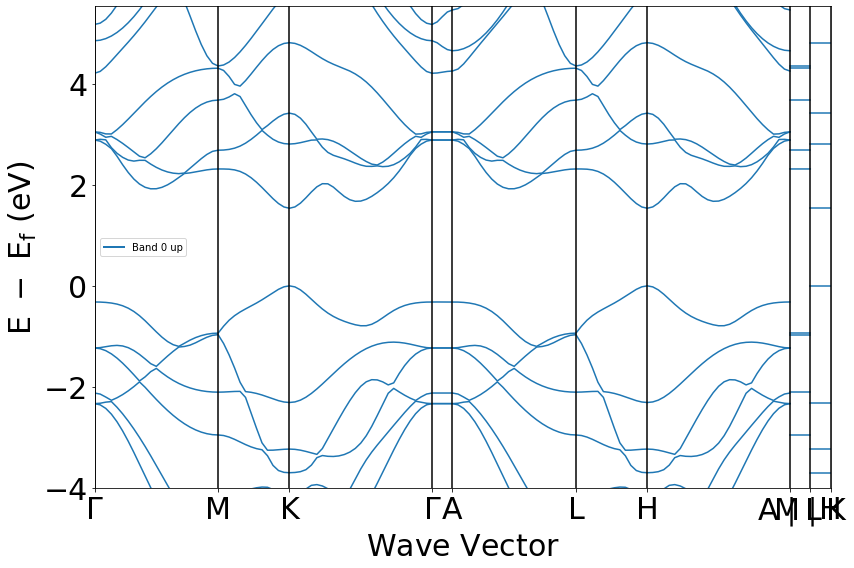

In [14]:
#création de la structure de bande du cristal
bandstruct = m.get_bandstructure_by_material_id("mp-1023936")

#création d'un objet BSPlotter pour pouvoir afficher le graphe
bs = BSPlotter(bandstruct)
bs.show()

## Bande interdite
La bande interdite par définition est la bande d'énergie qui sépare les intervalles d'énergie de la bande de conduction, des intervalles d'énergie de la bande de valence dans lesquels les électrons peuvent prendre des valeurs d'énergie.

In [15]:
print(bandstruct.get_band_gap())

{'direct': True, 'energy': 1.5378, 'transition': 'K-K'}


Pour notre matériau la bande interdite a une largeur de 1.5378 eV (on est donc plutôt sur un matériau semi-conducteur) et est dite 'directe'. Cela signifie que le maximum de la dernière bande de valence est alignée (en K) avec le minimum de la première bande de conduction. Nous avons alors une transition K-K comme nous pouvons le voir sur l'image ci-dessous (avec la bande interdite en rouge).

In [16]:
%%html
<img src = "bande_interd.PNG">

## Dispersion dernière bande de valence

Afin de pouvoir trouver la direction dans laquelle la dernière bande de valence présente le plus et le moins de dispersion nous devons d'abord calculer les longueurs des différents intervalles. Ainsi nous serons pour quelles valeurs des vecteurs d'onde nous devons calculer l'énergie de l'électron. Nous pourrons alors trouver la pente pour chaque intervalle et sélectionner la plus grande et la plus petite.

In [17]:
#la dernière bande de valence est la bande de numéro 11 dans l'ensemble des bandes de WSe2

data = bs.bs_plot_data()
dist = data.get('ticks').get('distance')
energie = data['energy']


#il faut enlever les distances qui reviennent plusieurs fois dans dist
xcoord = [dist[0]]
for i in range(1,len(dist)-1):
    if dist[i] != xcoord[-1]:
        xcoord.append(dist[i])


x_gauch = 0; x_droit = 0
e_gauch = 0; e_droit = 0
coorx_max_val = [0,0]; coorx_min_val = [0,0]
band_max_val = [0,0]; band_min_val = [0,0]  
pente_max_val = 0; pente_min_val = 10000
          
            
for i in range(len(xcoord)-1):
    x_gauch = xcoord[i]
    x_droit = xcoord[i+1]
    
    energ_val = energie['1'][i][:][11]
    e_gauch = energ_val[0]    
    e_droit = energ_val[-1]
    
    pente = np.abs((e_droit-e_gauch)/(x_droit-x_gauch))
    
    if pente > pente_max_val:
        pente_max_val = pente
        coorx_max_val[0] = x_gauch
        coorx_max_val[1] = x_droit
        band_max_val[0] = e_gauch
        band_max_val[1] = e_droit
    if pente < pente_min_val:
        pente_min_val = pente
        coorx_min_val[0] = x_gauch
        coorx_min_val[1] = x_droit
        band_min_val[0] = e_gauch
        band_min_val[1] = e_droit

print("Nous avons une pente maximale valant {0} dans la dernière bande de valence dans l'intervalle de vecteurs d'onde {1}".format(str(pente_max_val), str(coorx_max_val)))
print("Nous avons une pente minimale valant {0} dans la dernière bande de valence dans l'intervalle de vecteurs d'onde {1}".format(str(pente_min_val), str(coorx_min_val)))

#print(band_max_val)
#print(band_min_val)


Nous avons une pente maximale valant 1.4876688435078567 dans la dernière bande de valence dans l'intervalle de vecteurs d'onde [4.250186725868789, 4.8799639804564645]
Nous avons une pente minimale valant 0.0 dans la dernière bande de valence dans l'intervalle de vecteurs d'onde [2.9801382486216976, 3.159380413168158]


On remarque donc que la direction qui présente le plus de dispersion dans la dernière bande de valence est la direction L-H. Et puis celle présentant le moins de dispersion est la direction $\Gamma$-A.

## Dispersion première bande de conduction
Pour trouver à nouveau les directions qui présentent le plus de dispersion mais dans la première bande de conduction cette fois-ci, nous allons procéder de la même manière qu'au point précédent.

In [18]:
#la première bande de conduction est la bande de numéro 12 dans l'ensemble des bandes de WSe2

x_gauch = 0; x_droit = 0
e_gauch = 0; e_droit = 0
coorx_max_cond = [0,0]; coorx_min_cond = [0,0]
band_max_cond = [0,0]; band_min_cond = [0,0]  
pente_max_cond = 0; pente_min_cond = 10000
          
            
for i in range(len(xcoord)-1):
    x_gauch = xcoord[i]
    x_droit = xcoord[i+1]
    
    energ_cond = energie['1'][i][:][12]
    e_gauch = energ_cond[0]    
    e_droit = energ_cond[-1]
    
    pente = np.abs((e_droit-e_gauch)/(x_droit-x_gauch))
    
    if pente > pente_max_cond:
        pente_max_cond = pente
        coorx_max_cond[0] = x_gauch
        coorx_max_cond[1] = x_droit
        band_max_cond[0] = e_gauch
        band_max_cond[1] = e_droit
    if pente < pente_min_cond:
        pente_min_cond = pente
        coorx_min_cond[0] = x_gauch
        coorx_min_cond[1] = x_droit
        band_min_cond[0] = e_gauch
        band_min_cond[1] = e_droit

        
print("Nous avons une pente maximale valant {0} dans la première bande de conduction dans l'intervalle de vecteurs d'onde {1}".format(str(pente_max_cond), str(coorx_max_cond)))
print("Nous avons une pente minimale valant {0} dans la première bande de conduction dans l'intervalle de vecteurs d'onde {1}".format(str(pente_min_cond), str(coorx_min_cond)))
        

Nous avons une pente maximale valant 1.236468917109154 dans la première bande de conduction dans l'intervalle de vecteurs d'onde [1.090806312700633, 1.7205835672883092]
Nous avons une pente minimale valant 0.0 dans la première bande de conduction dans l'intervalle de vecteurs d'onde [2.9801382486216976, 3.159380413168158]


On remarque donc que la direction qui présente le plus de dispersion dans la première bande de conduction est la direction M-K. Et puis celle présentant le moins de dispersion est la direction $\Gamma$-A.

## Affichage dispersion maximale et minimale
A l'aide des flèches vertes, qui montrent où les dispersions sont les plus grandes, et les rouges, qui montrent où celles-ci sont les plus faibles, nous pouvons bien visualiser ces dispersions (de la dernière bande de valence et de la première bande de conduction) sur le graphe ci-dessous.

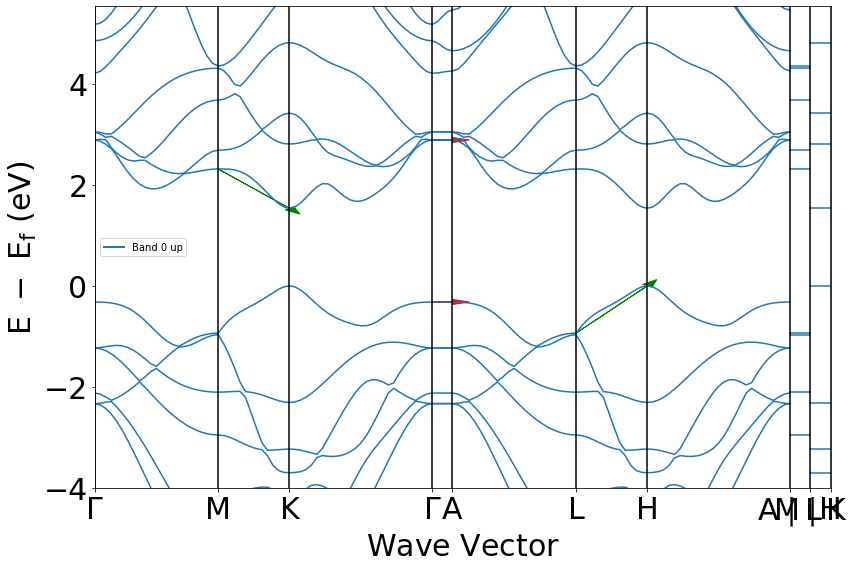

In [19]:
bs.get_plot()

#dernière bande de valence
flech_val_max = plt.arrow(coorx_max_val[0],band_max_val[0],coorx_max_val[1]-coorx_max_val[0],band_max_val[1]-band_max_val[0], color = 'green', head_width = 0.1)
flech_val_min = plt.arrow(coorx_min_val[0],band_min_val[0],coorx_min_val[1]-coorx_min_val[0],band_min_val[1]-band_min_val[0], color = 'red', head_width = 0.1)

#première bande de conduction
flech_cond_max = plt.arrow(coorx_max_cond[0],band_max_cond[0],coorx_max_cond[1]-coorx_max_cond[0],band_max_cond[1]-band_max_cond[0], color = 'green', head_width = 0.1)
flech_cond_min = plt.arrow(coorx_min_cond[0],band_min_cond[0],coorx_min_cond[1]-coorx_min_cond[0],band_min_cond[1]-band_min_cond[0], color = 'red', head_width = 0.1)


## Masse effective

La masse effective des électrons, qui est la masse de ceux-ci lorsqu'ils sont soumis à un potentiel électronique dans le réseau cristallin, peut se trouver à l'aide de la formule $m^* = \frac{\hbar^2}{\frac{\partial^2 E}{\partial k^2}}$ où $\hbar^2$ est la constante reduite de Planck. Nous pouvons remarquer que nous aurons bien une valeur constante pour la masse effective si nous supposons que l'énergie suit une dispersion parabolique de type E(k) = ak²+bk+c. Il nous faut donc trouver le coefficient 'a' afin de connaître la dérivée seconde de cette dispersion. Pour ce faire, nous allons utiliser les coordonnées du sommet de la dernière bande de valence et la première bande de conduction, ainsi qu'un autre point sur ces courbes.

In [20]:
#####dernière bande de valence#####
long_interv = xcoord[2]-xcoord[1]
#coordonnées point maximum en K
x1 = xcoord[2]
y1 = energie['1'][1][:][11][-1]
#coordonnées autre point sur la courbe (len(energie['1'][1][:][11]))=14)
x2 = xcoord[2]-long_interv/len(energie['1'][1][:][11])
y2 = energie['1'][1][:][11][-2]

a = (y2-y1)/(x1-x2)**2
b = -2*a*x1
c = y1 + a*x1**2

x_val = np.linspace(xcoord[1] ,xcoord[3],100)
y_val = a*x_val**2+b*x_val+c

#constante de planck h_bar [J.s]
h_bar = 1.054571818 * 1e-34 
eV = 1.602176634 * 1e-19

dev_sec = 2*a*1e-20*eV  #(besoin d'adapter les unités)

m_eff = (h_bar**2)/dev_sec

print("la masse effective de la dernière bande de valence est de {} kg".format(str(m_eff)))



la masse effective de la dernière bande de valence est de -3.657872602554199e-31 kg


In [21]:
#####première bande de conduction#####
long_interv = xcoord[2]-xcoord[1]
#coordonnées point minimum en K
x1 = xcoord[2]
y1 = energie['1'][1][:][12][-1]

#coordonnées autre point sur la courbe (len(energie['1'][1][:][12]))=14)
x2 = xcoord[2]-long_interv/len(energie['1'][1][:][11])
y2 = energie['1'][1][:][12][-2]

a = (y2-y1)/(x1-x2)**2
b = -2*a*x1
c = y1 + a*x1**2

x_cond = np.linspace(xcoord[1] ,xcoord[3],100)
y_cond = a*x_cond**2+b*x_cond+c

#constante de planck h_bar [J.s]
h_bar = 1.054571818 * 1e-34 
eV = 1.602176634 * 1e-19

dev_sec = 2*a*1e-20*eV   #(besoin d'adapter les unités)

m_eff = (h_bar**2)/dev_sec

print("la masse effective de la première bande de conduction est de {} kg".format(str(m_eff)))

la masse effective de la première bande de conduction est de 2.7650060617732828e-31 kg


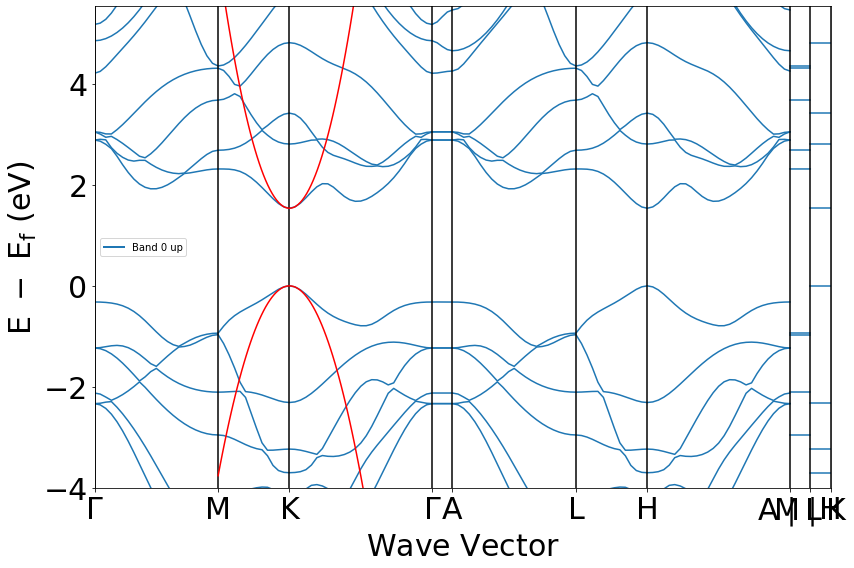

In [22]:
bs.get_plot()
plt.plot(x_val,y_val,'r')
plt.plot(x_cond,y_cond,'r')

Notons tout de même que la masse effective varie beaucoup en fonction du deuxième point choisi sur la courbe et donc de l'approximation parabolique qui est faite.